In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import sklearn.metrics as sm

In [3]:
data = pd.read_csv('Dataset.csv')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [71]:
df = data.drop(['Restaurant ID','Restaurant Name','Country Code','Cuisines','City','Address','Locality','Locality Verbose','Longitude','Latitude','Currency', 'Rating color', 'Rating text'],axis=1)

In [72]:
df.head()

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
0,1100,Yes,No,No,No,3,4.8,314
1,1200,Yes,No,No,No,3,4.5,591
2,4000,Yes,No,No,No,4,4.4,270
3,1500,No,No,No,No,4,4.9,365
4,1500,Yes,No,No,No,4,4.8,229


In [74]:
X = df.drop(['Aggregate rating'],axis=1)
Y = df['Aggregate rating']

In [77]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant',fill_value=1)
X_transformed = pd.DataFrame(imputer.fit_transform(X),columns=X.columns)
imputer.fit_transform(X)
print(X_transformed.head())

  Average Cost for two Has Table booking Has Online delivery  \
0                 1100               Yes                  No   
1                 1200               Yes                  No   
2                 4000               Yes                  No   
3                 1500                No                  No   
4                 1500               Yes                  No   

  Is delivering now Switch to order menu Price range Votes  
0                No                   No           3   314  
1                No                   No           3   591  
2                No                   No           4   270  
3                No                   No           4   365  
4                No                   No           4   229  


In [78]:
X_train,X_test,Y_train,Y_test = train_test_split(X_transformed,Y,test_size=0.3,random_state=42)

In [79]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
print(lr.score(X_train,Y_train))

ValueError: ignored

In [39]:
y_pred = lr.predict(X_test)


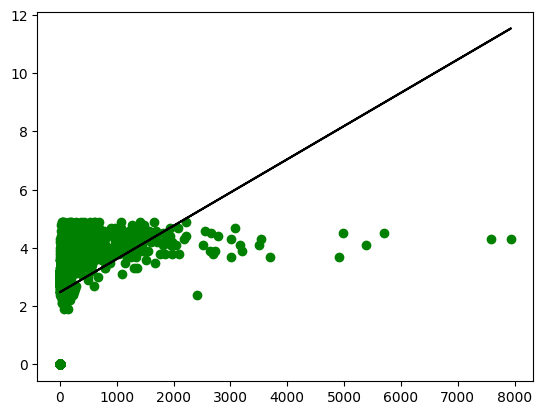

In [40]:
plt.scatter(X_test, Y_test, color='g')
plt.plot(X_test, y_pred, color='k')
plt.show()

In [44]:
print('R2 score=',round(sm.r2_score(Y_test,y_pred),2))
mse = sm.mean_squared_error(Y_test,y_pred)
print(f'Mean Squared Error (MSE): {mse}')

R2 score= 0.09
Mean Squared Error (MSE): 2.0496703361844673


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming 'df' is your DataFrame
# Drop unnecessary columns
df = pd.read_csv('Dataset .csv')
df = df.drop(['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose', 'Currency', 'Rating color', 'Rating text'], axis=1)

# Identify features (X) and target variable (y)
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Display the preprocessed data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [55]:
from sklearn.linear_model import LinearRegression

# Create a pipeline with preprocessor and regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Country Code', 'Longitude', 'Latitude', 'Average Cost for two',
       'Price range', 'Votes'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['City', 'Cuisines', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 1.4863727527816268
R-squared (R²): 0.3469676719744761


In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (assuming it's stored in a variable named 'df')
# ...

# Drop unnecessary columns
df =pd.read_csv('Dataset .csv')
df = df.drop(['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose', 'Currency', 'Rating color', 'Rating text'], axis=1)

# Identify features (X) and target variable (y)
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define a pipeline with preprocessor and Decision Tree Regressor
model_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

# Define hyperparameters to tune
param_grid = {
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model_dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model_dt = grid_search.best_estimator_

# Predict on the test set
y_pred_dt = best_model_dt.predict(X_test)

# Evaluate performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Mean Squared Error (MSE): {mse_dt}')
print(f'Decision Tree R-squared (R²): {r2_dt}')



Decision Tree Mean Squared Error (MSE): 0.11021116915676289
Decision Tree R-squared (R²): 0.9515791336768203
